## Análisis Discriminante Lineal (LDA)

El análisis discriminante lineal es un modelo de clasificación que se utiliza para encontrar una combinación lineal de características que separe dos o más clases de manera óptima.

### Objetivo
Determinar la clase a la que pertenece una observación, basándose en una combinación lineal de las características, maximizando la varianza entre clases y minimizando la varianza dentro de cada clase.

### Conceptos Claves:
- **Varianza entre y dentro de las clases**: LDA busca maximizar la separación entre las medias de las clases y minimizar la varianza dentro de cada clase.
- **Función discriminante lineal**: Es una combinación lineal de las características, que se utiliza para proyectar los datos en un espacio de menor dimensión.
  $$
  Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_nX_n
  $$
- **Coeficientes (β)**: Representan el peso de cada característica en la función discriminante.
- **Suposiciones de LDA**: Asume que las características tienen una distribución normal y varianzas iguales entre clases.

### Variables requeridas
LDA trabaja mejor con variables continuas que tengan distribuciones normales y varianzas similares entre clases.

### Algoritmo
1. **Preparación de los datos**: Estandarizar las variables y verificar la normalidad y homogeneidad de varianzas.
2. **Cálculo de medias y covarianzas**: Calcular las medias de cada clase y la matriz de covarianza compartida.
3. **Construcción de la función discriminante**: Usar las medias y la matriz de covarianza para obtener los coeficientes de la función discriminante.
4. **Clasificación**: Calcular el valor de la función discriminante para cada observación y asignarla a la clase con el valor más alto.
5. **Proyección de datos** (opcional): Reducir la dimensionalidad del conjunto de datos proyectándolos en los vectores discriminantes.

### Evaluación
Se evalúa con métricas como precisión, exactitud, sensibilidad y especificidad, además de una matriz de confusión. También se puede visualizar la separación de clases en un gráfico de dispersión y utilizar el AUC-ROC para el rendimiento en problemas binarios.


In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset
data = load_breast_cancer()

# Crear un DataFrame
df_breast_cancer = pd.DataFrame(data.data, columns=data.feature_names)

# Agregar la columna de la variable objetivo (target)
df_breast_cancer['target'] = data.target

# Mostrar las primeras filas del dataset
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
# Estadísticas descriptivas
df_breast_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
from sklearn.preprocessing import StandardScaler

# Separar las características y la variable objetivo
X = df_breast_cancer.drop('target', axis=1)
y = df_breast_cancer['target']

# Normalización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para mantener la estructura
X_scaled_df = pd.DataFrame(X_scaled, columns=data.feature_names)

# Mostrar las primeras filas de los datos normalizados
X_scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [6]:
from sklearn.model_selection import train_test_split

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Verificar las dimensiones de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (398, 30)
Tamaño del conjunto de prueba: (171, 30)


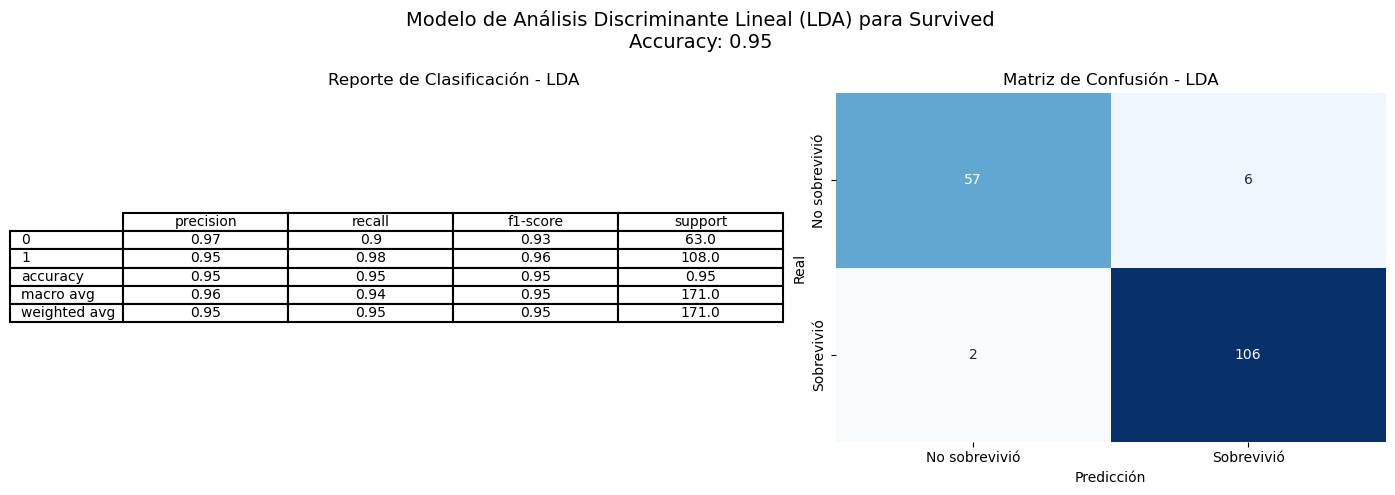

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instanciar el modelo LDA
lda_model = LinearDiscriminantAnalysis()

# Entrenar el modelo
lda_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_lda = lda_model.predict(X_test)

# Evaluar el modelo
accuracy_lda = accuracy_score(y_test, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
report_df_lda = pd.DataFrame(classification_report(y_test, y_pred_lda, output_dict=True)).transpose().round(2)

# Resultados del Análisis Discriminante Lineal
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Modelo de Análisis Discriminante Lineal (LDA) para Survived\nAccuracy: {accuracy_lda:.2f}', fontsize=14)

# Reporte de clasificación
ax[0].set_title("Reporte de Clasificación - LDA", fontsize=12)
ax[0].axis('off')
table_lda = ax[0].table(cellText=report_df_lda.values, colLabels=report_df_lda.columns, rowLabels=report_df_lda.index, cellLoc='center', loc='center', edges='BRTL')
table_lda.auto_set_font_size(False)
table_lda.set_fontsize(10)
table_lda.scale(1.2, 1.2)
for key, cell in table_lda.get_celld().items():
    cell.set_linewidth(1.5)

# Matriz de confusión
sns.heatmap(conf_matrix_lda, annot=True, fmt="d", cmap="Blues", ax=ax[1], cbar=False,
            xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
ax[1].set_title("Matriz de Confusión - LDA", fontsize=12)
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


# Conclusiones del Análisis Discriminante Lineal (LDA) para Predicción de Cáncer de Mama

## Resultados Generales
- **Accuracy:** 0.95 (95% de precisión). Esto indica que el modelo clasifica correctamente el 95% de los casos, lo cual es un buen resultado.

## Reporte de Clasificación
- **Clase 0 (No tiene cáncer):**
  - **Precisión:** 0.97: Esto significa que el 97% de las predicciones de que un paciente no tiene cáncer son correctas.
  - **Recall:** 0.90: De todos los casos que realmente no tienen cáncer, el 90% fueron identificados correctamente por el modelo. Esto puede indicar que hay una cantidad razonable de falsos positivos (casos que fueron clasificados incorrectamente como positivos).
  - **F1-Score:** 0.93: Esta métrica considera tanto la precisión como el recall, indicando un buen balance entre ambos.

- **Clase 1 (Tiene cáncer):**
  - **Precisión:** 0.95: Esto sugiere que el 95% de las predicciones de que un paciente tiene cáncer son correctas.
  - **Recall:** 0.98: El modelo identificó correctamente el 98% de los casos reales de cáncer, lo que indica que es muy eficaz para detectar casos positivos.
  - **F1-Score:** 0.96: Nuevamente, esto sugiere un buen balance entre la precisión y el recall.

## Matriz de Confusión
- **Verdaderos Negativos (TN):** 57 (correctamente clasificados como no teniendo cáncer)
- **Falsos Positivos (FP):** 6 (incorrectamente clasificados como teniendo cáncer)
- **Falsos Negativos (FN):** 2 (incorrectamente clasificados como no teniendo cáncer)
- **Verdaderos Positivos (TP):** 106 (correctamente clasificados como teniendo cáncer)

## Conclusiones
1. **Eficiencia del Modelo:** El modelo LDA tiene un alto rendimiento en términos de precisión y recall, especialmente para la clase positiva (tener cáncer). Esto indica que es muy efectivo para identificar a los pacientes que realmente tienen cáncer de mama.

2. **Falsos Negativos Mínimos:** Solo 2 casos fueron clasificados incorrectamente como no teniendo cáncer, lo que es crítico en el contexto de la salud, ya que esto significa que la mayoría de los pacientes con cáncer son identificados correctamente.

3. **Falsos Positivos Presentes:** Sin embargo, hay 6 falsos positivos, lo que podría resultar en algunos pacientes siendo sometidos a pruebas adicionales o tratamientos innecesarios. Esto es un aspecto a considerar, especialmente en situaciones clínicas.

4. **Recomendaciones:** Dado el alto rendimiento del modelo, podría ser útil en la práctica clínica, pero también es importante complementarlo con otras pruebas y evaluaciones para asegurar diagnósticos precisos y confiables.

En resumen, el modelo parece ser efectivo para predecir la presencia de cáncer de mama, con un alto porcentaje de precisión, pero siempre se debe tener en cuenta la posibilidad de falsos positivos y negativos al tomar decisiones clínicas.